In [1]:
from numpy import *
from matplotlib.pyplot import *
from scipy.integrate import odeint

In [2]:
b = 1
k = 1
m1 = m2 = 1

In [3]:
# the function defining the right-hand sides of the ODEs
def dz_dt(z, t):
    z1, z2, z3, z4, z5, z6, z7, z8 = z
    
    r21 = sqrt((z5-z1)**2+(z7-z3)**2)
    r12 = -r21
    eps = 1e-6
    if r21 < eps:
        r21 = eps
        
    F12 = k*b**2 / r12
    dzdt = [z2, F12*(z5-z1)/m1, z4, F12*(z7-z3)/m1,\
            z6, -F12*(z5-z1)/m2, z8, -F12*(z7-z3)/m2]
    return dzdt

In [4]:
v1x_i = 10
z0 = [-10,v1x_i,0.5,0,0,0,-0.5,0]

In [5]:
t_start = 0
t_end = 5
nt = 10000
t = np.linspace(t_start, t_end, nt)
sol = odeint(dz_dt, z0, t)

In [6]:
x1, v1x, y1, v1y, x2, v2x, y2, v2y = sol.T

In [7]:
r1 = sqrt(x1**2 + y1**2)
r2 = sqrt(x2**2 + y2**2)

In [8]:
mask = r1-r2 <= 10
x1, y1, x2, y2 = x1[mask], y1[mask], x2[mask], y2[mask]

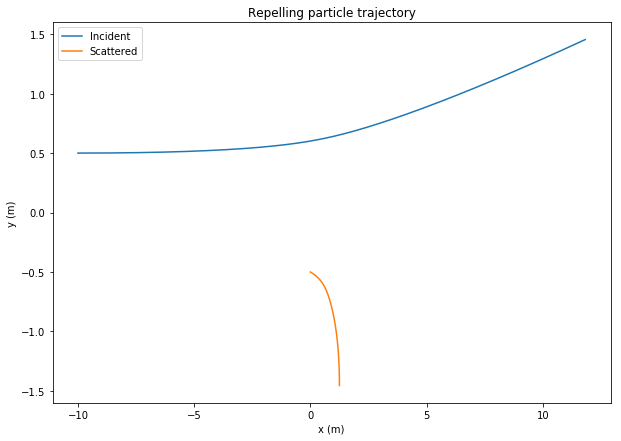

In [9]:
figure(figsize=(10,7))
plot(x1, y1, x2, y2)
legend(["Incident", "Scattered"])
title("Repelling particle trajectory")
xlabel("x (m)")
ylabel("y (m)")
show()

In [10]:
nn = 50
tan_incident = (y1[-nn]-y1[-1])/(x1[-nn]-x1[-1])
incident = 180 * (arctan(tan_incident)/pi)

tan_scattered = (y2[-nn]-y2[-1])/(x2[-nn]-x2[-1])
scattered = 180 * (arctan(tan_scattered)/pi)

print(f"Incident scattering angle is {round(incident,1)} degrees")
print(f"Recoiling scattering angle is {round(scattered,1)} degrees")
print(f"The sum is {round(incident+scattered, 1)} degrees")
print("The sum is not 90 degrees, but the angles are depend on the section selected and are not exact")

Incident scattering angle is 5.2 degrees
Recoiling scattering angle is -89.9 degrees
The sum is -84.7 degrees
The sum is not 90 degrees, but the angles are depend on the section selected and are not exact


In [11]:
p1x_i = m1 * v1x_i

p1x_f = m1 * v1x[-1]
p1y_f = m1 * v1y[-1]

p2x_f = m2 * v2x[-1]
p2y_f = m2 * v2y[-1]

In [12]:
print(f"Initial incoming x momentum = {p1x_i}")
print(f"Total final x moment = {p1x_f + p2x_f}")
print(f"Total final y moment = {p1y_f + p2y_f}")
print("Momentum is conserved. (floating point digits are not)")

Initial incoming x momentum = 10
Total final x moment = 9.999999999999993
Total final y moment = 0.0
Momentum is conserved. (floating point digits are not)
